## Breaking Down NCAA Basketball: Unveiling the Secrets of the NCAA

### By Daniel Lightner and Marcus Amerine

The College Basketball Dataset consists of statistics from NCAA Division I basketball teams across the 2013 to 2023 seasons, excluding the 2020 season, which was not played due to the Coronavirus pandemic. This dataset combines data from the 2013-2019 seasons and the 2021-2024 seasons. It includes a variety of performance metrics, such as adjusted offensive and defensive efficiency, shooting percentages, and wins. Analyzing this dataset allows us to uncover factors that contribute to a team's success in the NCAA tournament.

All of the variables within the cbb.csv file

- **TEAM**: The name of the Division I college basketball school.
- **CONF**: The Athletic Conference in which the school participates (e.g., ACC, Big Ten).
- **G**: Total number of games played by the team in the season.
- **W**: Total number of games won by the team in the season.
- **ADJOE**: Adjusted Offensive Efficiency; a measure of points scored per 100 possessions against average defenses.
- **ADJDE**: Adjusted Defensive Efficiency; a measure of points allowed per 100 possessions against average offenses. 
- **BARTHAG**: Power Rating indicating the team's chance of beating an average Division I team.
- **EFG_O**: Effective Field Goal Percentage for shots taken by the team.
- **EFG_D**: Effective Field Goal Percentage allowed by the team.
- **TOR**: Turnover Percentage Allowed; the rate at which opponents commit turnovers against the team.
- **TORD**: Turnover Percentage Committed; the rate at which the team commits turnovers.
- **ORB**: Offensive Rebound Rate; the percentage of available offensive rebounds secured by the team.
- **DRB**: Defensive Rebound Rate; the percentage of available defensive rebounds secured by the team.
- **FTR**: Free Throw Rate; the frequency with which the team shoots free throws per field goal attempt.
- **FTRD**: Free Throw Rate Allowed; the frequency with which opponents shoot free throws against the team.
- **2P_O**: Two-Point Shooting Percentage for shots taken by the team.
- **2P_D**: Two-Point Shooting Percentage allowed by the team.
- **3P_O**: Three-Point Shooting Percentage for shots taken by the team.
- **3P_D**: Three-Point Shooting Percentage allowed by the team.
- **ADJ_T**: Adjusted Tempo; an estimate of possessions per 40 minutes against average tempo.
- **WAB**: Wins Above Bubble; indicates how many wins above the cut-off for NCAA tournament qualification a team has.
- **POSTSEASON**: The round in which the team was eliminated in the NCAA tournament (e.g., R64, S16).
- **SEED**: The seed assigned to the team in the NCAA March Madness Tournament.
- **YEAR**: The season year of the data (e.g., 2021).


### Key Variables for Analysis - These variables are important because they will be explored further.

- **ADJOE**: Adjusted Offensive Efficiency; helps evaluate a team's scoring capabilities against average defenses.
- **ADJDE**: Adjusted Defensive Efficiency; provides insight into how well a team prevents scoring against average offenses.
- **WAB**: Wins Above Bubble; indicates a team's performance relative to the NCAA tournament qualification threshold.
- **CONF**: The Athletic Conference in which the school participates (e.g., ACC, Big Ten).

- We will use each variable for different parts of the anaylsis. Clustering for WAB, ADJOE, and ADJDE; CONF for making a decision tree predictor.

In [32]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.spatial import distance as sdist

df = pd.read_csv('cbb.csv')
print(df.head(30))

              TEAM  CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0   North Carolina   ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1        Wisconsin   B10  40  36  129.1   93.6   0.9758   54.8   47.7  12.4   
2         Michigan   B10  40  33  114.4   90.4   0.9375   53.9   47.7  14.0   
3       Texas Tech   B12  38  31  115.2   85.2   0.9696   53.5   43.0  17.7   
4          Gonzaga   WCC  39  37  117.8   86.3   0.9728   56.6   41.1  16.2   
5         Kentucky   SEC  40  29  117.2   96.2   0.9062   49.9   46.0  18.1   
6         Michigan   B10  38  30  121.5   93.7   0.9522   54.6   48.0  14.6   
7             Duke   ACC  39  35  125.2   90.6   0.9764   56.6   46.5  16.3   
8         Virginia   ACC  38  35  123.0   89.9   0.9736   55.2   44.7  14.7   
9   North Carolina   ACC  39  33  121.0   91.5   0.9615   51.7   48.1  16.2   
10       Villanova    BE  40  35  123.1   90.9   0.9703   56.1   46.7  16.3   
11       Villanova    BE  40  36  128.4   94.1   0.9

In [33]:
df.dtypes

TEAM           object
CONF           object
G               int64
W               int64
ADJOE         float64
ADJDE         float64
BARTHAG       float64
EFG_O         float64
EFG_D         float64
TOR           float64
TORD          float64
ORB           float64
DRB           float64
FTR           float64
FTRD          float64
2P_O          float64
2P_D          float64
3P_O          float64
3P_D          float64
ADJ_T         float64
WAB           float64
POSTSEASON     object
SEED          float64
YEAR            int64
dtype: object

In [34]:
df_numeric = df.drop(columns=["TEAM", "CONF", "POSTSEASON", "SEED", "YEAR", "G", "W"])

In [35]:
df_numeric.dtypes

ADJOE      float64
ADJDE      float64
BARTHAG    float64
EFG_O      float64
EFG_D      float64
TOR        float64
TORD       float64
ORB        float64
DRB        float64
FTR        float64
FTRD       float64
2P_O       float64
2P_D       float64
3P_O       float64
3P_D       float64
ADJ_T      float64
WAB        float64
dtype: object

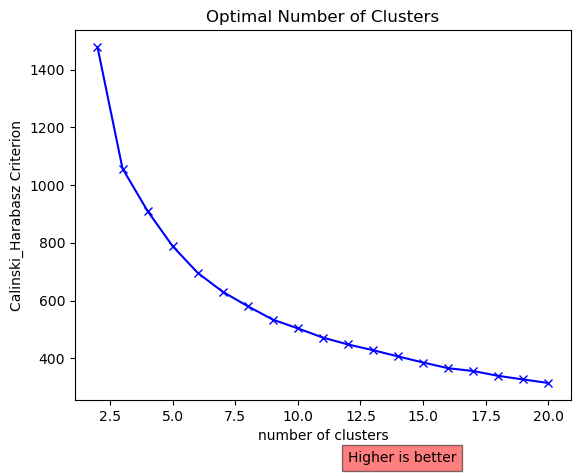

In [36]:
# Calinski and Harabasz Criterion
from sklearn.metrics import calinski_harabasz_score
from matplotlib import pyplot as plt

ch_score = []
for n in range(2, 21):
  kmeans = KMeans(n, random_state=12345).fit(df_numeric)
  ch_score.append(calinski_harabasz_score(df_numeric, labels=kmeans.labels_))

plt.plot(range(2, 21), ch_score, 'bx-')
plt.xlabel('number of clusters') 
plt.ylabel('Calinski_Harabasz Criterion') 
plt.title('Optimal Number of Clusters')
plt.text(12, 40, 'Higher is better', bbox=dict(facecolor='red', alpha=0.5))
plt.show()

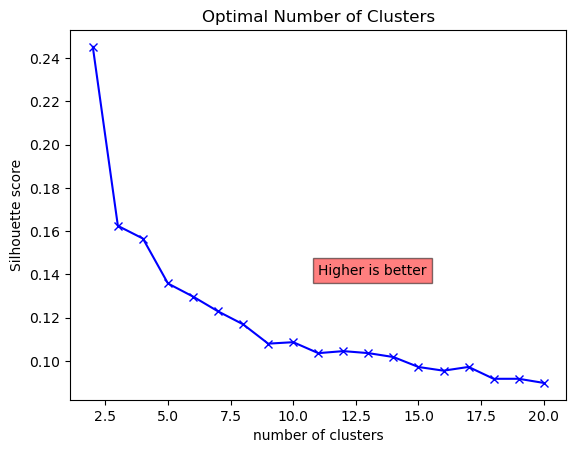

In [37]:
# Silhouette Analysis
from sklearn.metrics import silhouette_score

si_score = []
for n in range(2, 21):
 kmeans = KMeans(n, random_state=12345).fit(df_numeric)
 si_score.append(silhouette_score(df_numeric, kmeans.labels_))

plt.plot(range(2, 21), si_score, 'bx-')
plt.xlabel('number of clusters') 
plt.ylabel('Silhouette score') 
plt.title('Optimal Number of Clusters')
plt.text(11, .14, 'Higher is better', bbox=dict(facecolor='red', alpha=0.5))
plt.show()

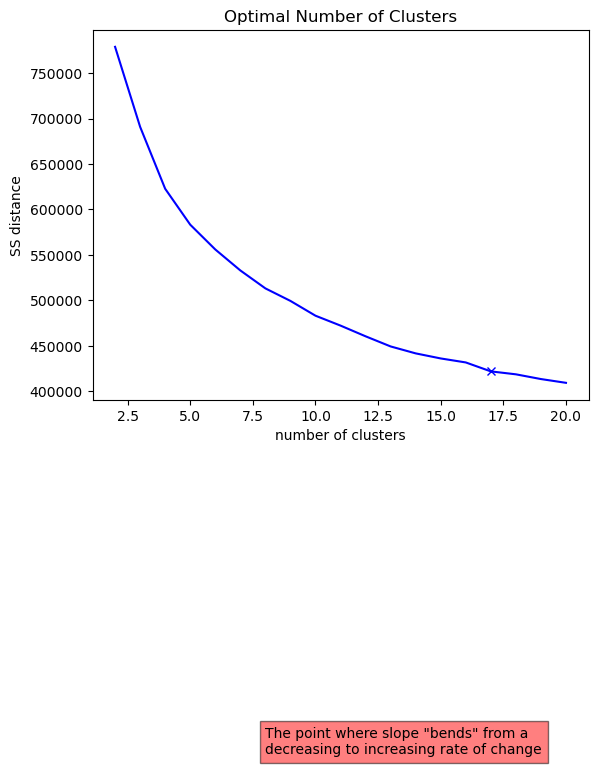

In [38]:
# WCSS: Elbow Method

ss_score = []
for n in range(2,21):
    kmeans = KMeans(n, random_state=12345).fit(df_numeric)
    ss_score.append(kmeans.inertia_)
    
# Where does the slope bend? Find the highest (least negative) slope.
changes = []
for n in range(2, 20):
  changes.append(float(ss_score[n - 1] - ss_score[n - 2]))

optimal_n = changes.index(max(changes))

plt.plot(range(2,21), ss_score, 'bx-', markevery=[optimal_n])
plt.xlabel('number of clusters')
plt.ylabel('SS distance')
plt.title('Optimal Number of Clusters')
plt.text(8, 900, 'The point where slope "bends" from a \ndecreasing to increasing rate of change', bbox=dict(facecolor='red', alpha=0.5))
plt.show()

## Cluster Count Evaluation Summary

To figure out how many clusters we should use, we tested a few different methods:

- **Silhouette Score**: This tells us how well each point fits within its cluster compared to other clusters. The best score came when we used **2 clusters**, so that might be a good fit.

- **Calinski-Harabasz Index**: This checks how different the clusters are from each other. Like the silhouette score, it also pointed to **2 clusters** being the best option.

- **Elbow Method (WCSS)**: This looks at how much the total within-cluster distance (WCSS) drops as we add more clusters. Even though the curve started flattening around **2 clusters**, the biggest “elbow” actually showed up at around **17 clusters**, which might mean the data has more detailed groupings.

### Conclusion

So basically, both the **Silhouette Score** and **Calinski-Harabasz Index** suggest that **2 clusters** is a solid choice. But if we want to break the data into more specific categories, the **Elbow Method** hints that **17 clusters** could also work. It really depends on whether we want a simple overview or a more detailed breakdown.

At first, we'll look deeper into the Elbow method with 17 clusters and then look at the 2 cluster results.

In [39]:
# Train the model
kmeans = KMeans(17, random_state=12345).fit(df_numeric)

# Add assigned clusters to a new DataFrame
df_wcluster = df_numeric.copy()
df_wcluster['cluster'] = kmeans.labels_
df_wcluster.head()

,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,cluster
0,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,5
1,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,5
2,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,5
3,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,5
4,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,5


In [40]:
# Which features played the largest role in determining clusters?

output_df = pd.DataFrame({'C0_means': df_wcluster[df_wcluster.cluster == 0].mean(), 'C1_means': df_wcluster[df_wcluster.cluster == 1].mean()})
output_df['diff'] = abs(output_df['C0_means'] - output_df['C1_means'])
output_df.drop(['cluster']).sort_values(by=['diff'], ascending=False)

,C0_means,C1_means,diff
ADJOE,91.861202,105.771837,13.910635
WAB,-14.544809,-4.279592,10.265217
FTRD,40.923497,31.478776,9.444722
2P_O,44.431694,50.972653,6.540959
EFG_O,45.010929,51.515918,6.504989
3P_O,30.726230,34.986531,4.260301
DRB,31.336066,28.177143,3.158923
FTR,34.425683,37.438776,3.013092
ADJDE,104.110929,101.187347,2.923582
TOR,21.029508,18.380816,2.648692


In [41]:
print(df_numeric.mean())

ADJOE      103.151320
ADJDE      103.153250
BARTHAG      0.494067
EFG_O       49.887823
EFG_D       50.087113
TOR         18.696509
TORD        18.625092
ORB         29.308544
DRB         29.516747
FTR         34.529066
FTRD        34.802555
2P_O        49.112433
2P_D        49.289299
3P_O        34.185580
3P_D        34.369316
ADJ_T       67.735339
WAB         -7.579620
dtype: float64


In [42]:
print(df_numeric.quantile(0.25))

ADJOE      98.2000
ADJDE      98.4000
BARTHAG     0.2813
EFG_O      47.9000
EFG_D      48.1000
TOR        17.3000
TORD       17.1000
ORB        26.5000
DRB        27.3000
FTR        30.6000
FTRD       30.2000
2P_O       46.8000
2P_D       47.1000
3P_O       32.3000
3P_D       32.7000
ADJ_T      65.7000
WAB       -12.6000
Name: 0.25, dtype: float64


### We are looking at different values for each of our values to fill into predictive methodology.

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Fit KMeans
kmeans = KMeans(n_clusters=17, random_state=42)
kmeans.fit(scaled_data)

# Prepare new data point
columns = [
    "ADJOE", "ADJDE", "BARTHAG", "EFG_O", "EFG_D", "TOR", "TORD",
    "ORB", "DRB", "FTR", "FTRD", "2P_O", "2P_D", "3P_O", "3P_D", "ADJ_T", "WAB"
]

new_df = pd.DataFrame([[
    108.5, 98.4, 0.72, 51.4, 48.3, 17.9, 18.7, 30.5, 28.5, 35.2, 32.8, 
    50.8, 47.5, 35.1, 33.3, 67.5, -1
]], columns=columns)

# Scale and predict
scaled = scaler.transform(new_df)
prediction = kmeans.predict(scaled)[0]

print(f"Predicted cluster: {prediction}")


Predicted cluster: 5


In [44]:
new_df = pd.DataFrame([[
    98.2, 98.4, 0.2813, 47.9, 48.1, 17.3, 17.1, 26.5, 27.3, 30.6, 30.2, 
    46.8, 47.1, 32.3, 32.7, 65.7, -12
]], columns=columns)

# Scale and predict
scaled = scaler.transform(new_df)
prediction = kmeans.predict(scaled)[0]

print(f"Predicted cluster: {prediction}")

Predicted cluster: 10


In [45]:
import plotly.express as px

fig = px.scatter_3d(
    df_wcluster, 
    x='WAB', y='ADJOE', z='ADJDE', 
    color='cluster', 
    size_max=20, opacity=1.0
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


### Note on the 17-Cluster Model

Yeah, 17 clusters sounds like a lot, but it actually makes sense. The Elbow Method pointed to 17 as a key point where the WCSS really started to level off, so it’s not just a random number. This model breaks the data into more detailed groups, which can help us find subtle patterns that would get lost if we only used 2 clusters. It’s definitely more complex, but if we’re trying to get a deeper look at the different types of data points, this model gives us that extra layer of detail.


In [46]:
# Train the model
kmeans = KMeans(2, random_state=12345).fit(df_numeric)

# Add assigned clusters to a new DataFrame
df_wcluster = df_numeric.copy()
df_wcluster['cluster'] = kmeans.labels_
df_wcluster.head()

,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,cluster
0,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,1
1,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,1
2,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,1
3,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,1
4,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,1


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)

# Prepare new data point
columns = [
    "ADJOE", "ADJDE", "BARTHAG", "EFG_O", "EFG_D", "TOR", "TORD",
    "ORB", "DRB", "FTR", "FTRD", "2P_O", "2P_D", "3P_O", "3P_D", "ADJ_T", "WAB"
]

new_df = pd.DataFrame([[
    108.5, 98.4, 0.72, 51.4, 48.3, 17.9, 18.7, 30.5, 28.5, 35.2, 32.8, 
    50.8, 47.5, 35.1, 33.3, 67.5, -1
]], columns=columns)

# Scale and predict
scaled = scaler.transform(new_df)
prediction = kmeans.predict(scaled)[0]

print(f"Predicted cluster: {prediction}")

Predicted cluster: 1


In [48]:
import plotly.express as px

fig = px.scatter_3d(
    df_wcluster, 
    x='WAB', y='ADJOE', z='ADJDE', 
    color='cluster', 
    size_max=20, opacity=1.0
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [49]:
# Train the model
kmeans = KMeans(3, random_state=12345).fit(df_numeric)

# Add assigned clusters to a new DataFrame
df_wcluster = df_numeric.copy()
df_wcluster['cluster'] = kmeans.labels_
df_wcluster.head()

,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,cluster
0,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2
1,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2
2,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2
3,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2
4,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Prepare new data point
columns = [
    "ADJOE", "ADJDE", "BARTHAG", "EFG_O", "EFG_D", "TOR", "TORD",
    "ORB", "DRB", "FTR", "FTRD", "2P_O", "2P_D", "3P_O", "3P_D", "ADJ_T", "WAB"
]

new_df = pd.DataFrame([[
    108.5, 98.4, 0.72, 51.4, 48.3, 17.9, 18.7, 30.5, 28.5, 35.2, 32.8, 
    50.8, 47.5, 35.1, 33.3, 67.5, -1
]], columns=columns)

# Scale and predict
scaled = scaler.transform(new_df)
prediction = kmeans.predict(scaled)[0]

print(f"Predicted cluster: {prediction}")

Predicted cluster: 1


In [51]:
import plotly.express as px

fig = px.scatter_3d(
    df_wcluster, 
    x='WAB', y='ADJOE', z='ADJDE', 
    color='cluster', 
    size_max=20, opacity=1.0
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [52]:
# Train the model
kmeans = KMeans(4, random_state=12345).fit(df_numeric)

# Add assigned clusters to a new DataFrame
df_wcluster = df_numeric.copy()
df_wcluster['cluster'] = kmeans.labels_
df_wcluster.head()

,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,cluster
0,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2
1,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2
2,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2
3,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2
4,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2


In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

# Prepare new data point
columns = [
    "ADJOE", "ADJDE", "BARTHAG", "EFG_O", "EFG_D", "TOR", "TORD",
    "ORB", "DRB", "FTR", "FTRD", "2P_O", "2P_D", "3P_O", "3P_D", "ADJ_T", "WAB"
]

new_df = pd.DataFrame([[
    108.5, 98.4, 0.72, 51.4, 48.3, 17.9, 18.7, 30.5, 28.5, 35.2, 32.8, 
    50.8, 47.5, 35.1, 33.3, 67.5, -1
]], columns=columns)

# Scale and predict
scaled = scaler.transform(new_df)
prediction = kmeans.predict(scaled)[0]

print(f"Predicted cluster: {prediction}")

Predicted cluster: 1


In [54]:
import plotly.express as px

fig = px.scatter_3d(
    df_wcluster, 
    x='WAB', y='ADJOE', z='ADJDE', 
    color='cluster', 
    size_max=20, opacity=1.0
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


### Note on the 2-Cluster Model
The 2-cluster model is much simpler and more straightforward. It creates a cleaner separation in the data, with the clusters looking more linear and distinct from each other. This makes it easier to interpret and visualize, as we’re essentially grouping everything into two major categories. While we lose some of the finer details that the 17-cluster model provides, the 2-cluster approach is useful for getting a high-level understanding of the data, especially when we want a clear, easy-to-understand split. It’s a good choice if simplicity and clarity are more important than capturing every little nuance.

In [55]:
def import_data(path, messages=True):
  import pandas as pd
  df = pd.read_csv(path)
  if messages: print(df.shape)
  return df

print(df.head(30))

              TEAM  CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0   North Carolina   ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1        Wisconsin   B10  40  36  129.1   93.6   0.9758   54.8   47.7  12.4   
2         Michigan   B10  40  33  114.4   90.4   0.9375   53.9   47.7  14.0   
3       Texas Tech   B12  38  31  115.2   85.2   0.9696   53.5   43.0  17.7   
4          Gonzaga   WCC  39  37  117.8   86.3   0.9728   56.6   41.1  16.2   
5         Kentucky   SEC  40  29  117.2   96.2   0.9062   49.9   46.0  18.1   
6         Michigan   B10  38  30  121.5   93.7   0.9522   54.6   48.0  14.6   
7             Duke   ACC  39  35  125.2   90.6   0.9764   56.6   46.5  16.3   
8         Virginia   ACC  38  35  123.0   89.9   0.9736   55.2   44.7  14.7   
9   North Carolina   ACC  39  33  121.0   91.5   0.9615   51.7   48.1  16.2   
10       Villanova    BE  40  35  123.1   90.9   0.9703   56.1   46.7  16.3   
11       Villanova    BE  40  36  128.4   94.1   0.9

In [56]:
print(df.dtypes)

TEAM           object
CONF           object
G               int64
W               int64
ADJOE         float64
ADJDE         float64
BARTHAG       float64
EFG_O         float64
EFG_D         float64
TOR           float64
TORD          float64
ORB           float64
DRB           float64
FTR           float64
FTRD          float64
2P_O          float64
2P_D          float64
3P_O          float64
3P_D          float64
ADJ_T         float64
WAB           float64
POSTSEASON     object
SEED          float64
YEAR            int64
dtype: object


In [57]:
import sklearn.linear_model as lm
import sklearn.ensemble as se
import sklearn.tree as tree
from sklearn import svm
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import svm
from sklearn.naive_bayes import CategoricalNB
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('cbb.csv')

In [58]:
print(df.head(10))

             TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0  North Carolina  ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1       Wisconsin  B10  40  36  129.1   93.6   0.9758   54.8   47.7  12.4   
2        Michigan  B10  40  33  114.4   90.4   0.9375   53.9   47.7  14.0   
3      Texas Tech  B12  38  31  115.2   85.2   0.9696   53.5   43.0  17.7   
4         Gonzaga  WCC  39  37  117.8   86.3   0.9728   56.6   41.1  16.2   
5        Kentucky  SEC  40  29  117.2   96.2   0.9062   49.9   46.0  18.1   
6        Michigan  B10  38  30  121.5   93.7   0.9522   54.6   48.0  14.6   
7            Duke  ACC  39  35  125.2   90.6   0.9764   56.6   46.5  16.3   
8        Virginia  ACC  38  35  123.0   89.9   0.9736   55.2   44.7  14.7   
9  North Carolina  ACC  39  33  121.0   91.5   0.9615   51.7   48.1  16.2   

   ...  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  POSTSEASON  SEED  YEAR  
0  ...  30.4  53.9  44.6  32.7  36.2   71.7   8.6         2ND   1.0  2016  


### Now we will begin to break down the difference Conferences with their predictors.

In [59]:
print(df.dtypes)

TEAM           object
CONF           object
G               int64
W               int64
ADJOE         float64
ADJDE         float64
BARTHAG       float64
EFG_O         float64
EFG_D         float64
TOR           float64
TORD          float64
ORB           float64
DRB           float64
FTR           float64
FTRD          float64
2P_O          float64
2P_D          float64
3P_O          float64
3P_D          float64
ADJ_T         float64
WAB           float64
POSTSEASON     object
SEED          float64
YEAR            int64
dtype: object


In [60]:
from sklearn import preprocessing

y = df['CONF']
X = df.drop(columns=['POSTSEASON', 'CONF', 'TEAM', 'YEAR'])  # 'TEAM' and 'YEAR' might not be relevant
X = pd.get_dummies(X, drop_first=True)
X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X), columns=X.columns)     
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X.head()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
0,1.000000,0.868421,0.889524,0.2725,0.968239,0.614679,0.414634,0.230263,0.437158,0.900685,0.527273,0.325641,0.314480,0.615970,0.293617,0.406250,0.594118,0.553435,0.882507,0.000000
1,1.000000,0.947368,1.000000,0.2400,0.991422,0.715596,0.395122,0.032895,0.306011,0.606164,0.240909,0.425641,0.133484,0.650190,0.297872,0.604167,0.670588,0.080153,0.953003,0.000000
2,1.000000,0.868421,0.720000,0.1600,0.952308,0.674312,0.395122,0.138158,0.508197,0.380137,0.295455,0.284615,0.305430,0.646388,0.387234,0.536458,0.417647,0.332061,0.838120,0.133333
3,0.942857,0.815789,0.735238,0.0300,0.985090,0.655963,0.165854,0.381579,0.688525,0.445205,0.468182,0.341026,0.454751,0.574144,0.178723,0.604167,0.211765,0.393130,0.840731,0.133333
4,0.971429,0.973684,0.784762,0.0575,0.988358,0.798165,0.073171,0.282895,0.377049,0.534247,0.354545,0.497436,0.235294,0.707224,0.097872,0.692708,0.170588,0.545802,0.859008,0.000000


In [61]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
    
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
    
# Predict the labels for test dataset
y_pred = clf.predict(X_test)

In [62]:
# View the predicted versus actual in a DataFrame

output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,})
output_df

,Actual,Predicted
2402,ACC,B12
1734,WAC,MAAC
3199,MWC,WCC
3180,BE,ACC
102,A10,Slnd
...,...,...
275,B10,Ivy
2456,B12,BE
3068,ASun,Amer
2753,CUSA,MAC


In [63]:
print(df['CONF'].unique())


['ACC' 'B10' 'B12' 'WCC' 'SEC' 'BE' 'Amer' 'P12' 'A10' 'MVC' 'AE' 'ASun'
 'BSky' 'BSth' 'BW' 'CAA' 'CUSA' 'Horz' 'Ind' 'Ivy' 'MAAC' 'MAC' 'MEAC'
 'MWC' 'NEC' 'OVC' 'Pat' 'SB' 'SC' 'Slnd' 'Sum' 'SWAC' 'WAC' 'ind' 'GWC']


In [64]:
print(len(set(y_test)))

33


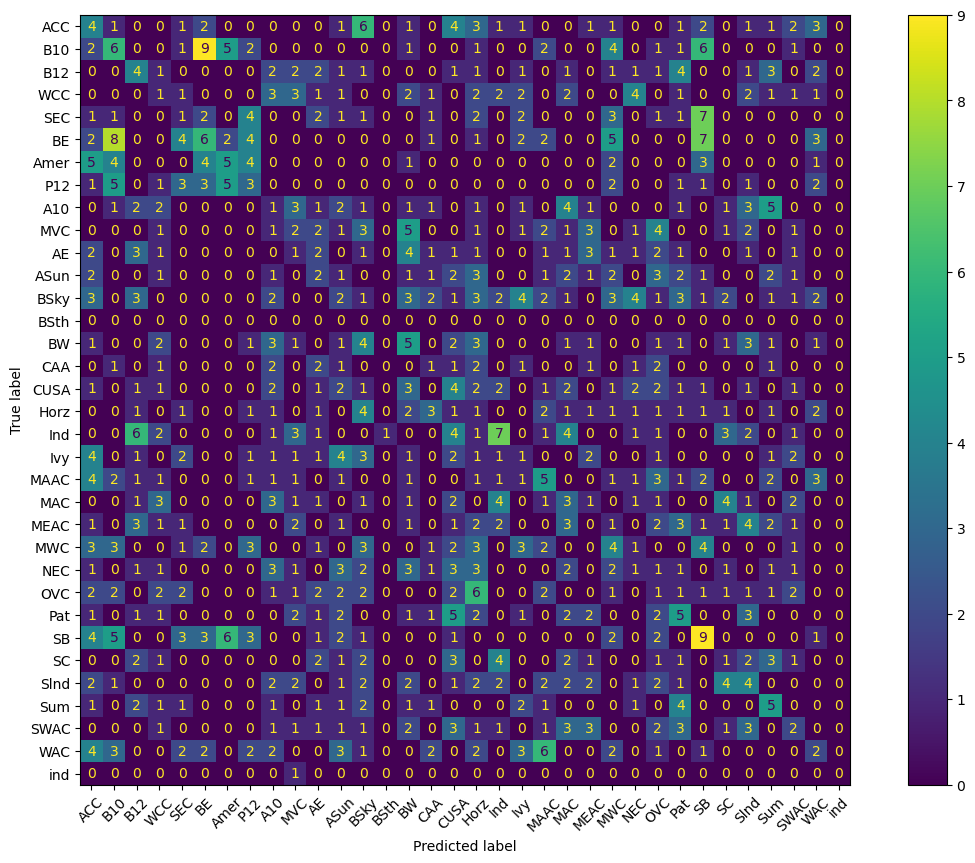

CONF
B10     47
CUSA    47
SEC     43
ACC     42
MEAC    39
WCC     38
A10     37
P12     37
Slnd    35
SB      35
MWC     34
Horz    33
OVC     33
MAAC    32
Pat     32
BSth    32
SC      32
BSky    32
WAC     31
NEC     31
ASun    31
MVC     30
Amer    30
AE      30
CAA     29
B12     29
MAC     29
BW      29
BE      28
SWAC    27
Sum     25
Ivy     17
ind      1
Name: count, dtype: int64


In [65]:
from sklearn import metrics
from matplotlib import pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['ACC', 'B10', 'B12', 'WCC', 'SEC', 'BE', 'Amer', 'P12', 'A10', 'MVC', 'AE', 'ASun',
 'BSky', 'BSth', 'BW', 'CAA', 'CUSA', 'Horz', 'Ind', 'Ivy', 'MAAC', 'MAC', 'MEAC',
 'MWC', 'NEC', 'OVC', 'Pat', 'SB', 'SC', 'Slnd', 'Sum', 'SWAC', 'WAC', 'ind'])  # Adjusted to match the number of unique labels
fig, ax = plt.subplots(figsize=(15, 10))  # Define figure and axis with custom size
cm_display.plot(values_format='d', ax=ax)
plt.xticks(rotation=45)
plt.show()
print(y_test.value_counts())  # USE THIS TO VERIFY YOUR PLOT


In [69]:
import pandas as pd

labels = ['ACC', 'B10', 'B12', 'WCC', 'SEC', 'BE', 'Amer', 'P12', 'A10', 'MVC', 'AE', 'ASun',
          'BSky', 'BSth', 'BW', 'CAA', 'CUSA', 'Horz', 'Ind', 'Ivy', 'MAAC', 'MAC', 'MEAC',
          'MWC', 'NEC', 'OVC', 'Pat', 'SB', 'SC', 'Slnd', 'Sum', 'SWAC', 'WAC', 'ind']

# Create DataFrame for easy viewing
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Save to CSV if needed:
# cm_df.to_csv("confusion_matrix.csv")

# Display top correct predictions (diagonal)
correct_preds = cm_df.values.diagonal()
top_preds = pd.Series(correct_preds, index=labels).sort_values(ascending=False)
print(top_preds)


SB      9
Ind     7
B10     6
BE      6
MAAC    5
Amer    5
Sum     5
Pat     5
BW      5
ACC     4
CUSA    4
Slnd    4
MWC     4
B12     4
P12     3
MAC     3
AE      2
MVC     2
SWAC    2
WAC     2
SC      1
OVC     1
NEC     1
Horz    1
Ivy     1
CAA     1
BSky    1
ASun    1
A10     1
SEC     1
WCC     1
MEAC    0
BSth    0
ind     0
dtype: int64


In [71]:
# Get all off-diagonal misclassifications
misclassifications = []

for true_idx in range(len(labels)):
    for pred_idx in range(len(labels)):
        if true_idx != pred_idx:
            count = cm[true_idx][pred_idx]
            if count > 0:
                misclassifications.append((labels[true_idx], labels[pred_idx], count))

# Sort by highest misclassification count
misclassifications.sort(key=lambda x: x[2], reverse=True)

# Print top 10 biggest misclassifications
print("Top 10 Misclassifications:")
for true_label, pred_label, count in misclassifications[:40]:
    print(f"{true_label} predicted as {pred_label}: {count} times")


Top 10 Misclassifications:
B10 predicted as BE: 9 times
BE predicted as B10: 8 times
SEC predicted as SB: 7 times
BE predicted as SB: 7 times
ACC predicted as BSky: 6 times
B10 predicted as SB: 6 times
Ind predicted as B12: 6 times
OVC predicted as Horz: 6 times
SB predicted as Amer: 6 times
WAC predicted as MAAC: 6 times
B10 predicted as Amer: 5 times
BE predicted as MWC: 5 times
Amer predicted as ACC: 5 times
P12 predicted as B10: 5 times
P12 predicted as Amer: 5 times
A10 predicted as Sum: 5 times
MVC predicted as BW: 5 times
Pat predicted as CUSA: 5 times
SB predicted as B10: 5 times
ACC predicted as CUSA: 4 times
B10 predicted as MWC: 4 times
B12 predicted as Pat: 4 times
WCC predicted as NEC: 4 times
SEC predicted as P12: 4 times
BE predicted as SEC: 4 times
BE predicted as P12: 4 times
Amer predicted as B10: 4 times
Amer predicted as BE: 4 times
Amer predicted as P12: 4 times
A10 predicted as MAC: 4 times
MVC predicted as OVC: 4 times
AE predicted as BW: 4 times
BSky predicted a

### Work in Progress: Refining Conference Predictions Based on Style of Play

This is a work in progress now, but we have an unreliable predictor for guessing which team is in each conference. We will need to later refine this for a more accurate predictor. Though inherently, this doesn't make much sense, as conferences are determined by factors beyond just style of play, there are still patterns that might be influenced by certain playstyles and team characteristics.

For example, teams in the **Big Ten** (B10) often display a more physical, defense-oriented style, with slower tempos and emphasis on rebounding. On the other hand, teams in the **Pac-12** (P12) tend to favor a faster-paced, more perimeter-oriented game, focusing on three-point shooting and spacing. These differences in style could influence the way teams are categorized based on certain statistics, like adjusted tempo or effective field goal percentage, but they are not definitive indicators of conference affiliation.

A team like **Michigan State** (Big Ten) might have a very different offensive and defensive style than a team like **Arizona** (Pac-12), yet both could share certain statistical features, such as a high rate of offensive rebounds or a strong free-throw rate. The challenge, then, lies in finding a way to refine this model, incorporating these nuanced differences in playstyle without conflating them with the actual factors that determine conference membership.

In the future, incorporating more advanced features like team historical performance or geographical patterns could improve predictions. But as it stands, we need to acknowledge the limitations of relying purely on style of play for classifying teams into conferences.
